In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

0.24.1


In [2]:
df = pd.read_csv('The-Office-Lines-V4.csv')
df= df.drop('Unnamed: 6', 1)

In [3]:
def gender(name):
    if name == 'Michael' or name == 'Jim' or name == 'Dwight' or name == 'Ryan' or name == 'Stanley' or name == 'Kevin' or name == 'Oscar' or name == 'Toby' or name == 'Creed' or name == 'Andy' or name == 'Roy' or name == 'Darryl' or name == 'Gabe' or name == 'Robert California' or name == 'Robert' or name == 'Clark' or name == 'Pete':
        return 0
    elif name == 'Pam' or name == 'Phyllis' or name == 'Angela' or name == 'Kelly' or name == 'Meredith' or name == 'Jan' or name == 'Erin' or name == 'Nellie':
        return 1

In [4]:
df["gender"] = df["speaker"].map(gender)

In [5]:
df = df.dropna()

In [6]:
df['gender'] = df['gender'].astype(int)

In [7]:
df['number_of_words'] = df['line'].str.split().str.len()

In [8]:
df['speaker_id'] = pd.factorize(df.speaker)[0]

In [9]:
df

,season,episode,title,scene,speaker,line,gender,number_of_words,speaker_id
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0,14,0
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0,9,1
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0,14,0
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0,8,1
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0,10,0
...,...,...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,0,55,16
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,1,41,14
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,1,31,5
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,0,46,1


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

In [11]:
X = df['line']
y = df['gender']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.70)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14299,), (14299,), (33365,), (33365,))

In [14]:
vect = CountVectorizer()
vect2 = TfidfVectorizer()
scaler = MaxAbsScaler()
tfidf = TfidfTransformer()
lr = LogisticRegression(max_iter=1000)

In [15]:
pipe = make_pipeline(vect, scaler, lr)
pipe2 = make_pipeline(vect2, scaler, lr)

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('maxabsscaler', MaxAbsScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [17]:
y_pred = pipe.predict(X_test)

In [18]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7506968380038963
              precision    recall  f1-score   support

           0       0.76      0.98      0.86     25223
           1       0.41      0.05      0.09      8142

    accuracy                           0.75     33365
   macro avg       0.59      0.51      0.47     33365
weighted avg       0.68      0.75      0.67     33365



In [19]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('maxabsscaler', MaxAbsScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [20]:
y_pred2 = pipe2.predict(X_test)

In [21]:
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))

# so tfidfvectorizer is slightly better; keep working with pipe2

accuracy 0.750367151206354
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     25223
           1       0.42      0.06      0.10      8142

    accuracy                           0.75     33365
   macro avg       0.59      0.52      0.48     33365
weighted avg       0.68      0.75      0.67     33365



In [22]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
cs = [0.01, 0.1, 1.0, 10.0, 100.0]

In [24]:
scores = cross_val_score(pipe2, X, y, cv=10, scoring='f1_macro') 
print(f"Mean {scores.mean()}, Std {scores.std()}")

Mean 0.4716752955910479, Std 0.009330098132314552


In [25]:
accuracies, params = [], []
for c in cs:
    lr = LogisticRegression(C=c)
    pipe = make_pipeline(vect2, scaler, lr)
    scores = cross_val_score(pipe2, X_train, y_train, cv=10, scoring='f1_macro')
    accuracies.append(scores.mean())
    params.append(c)

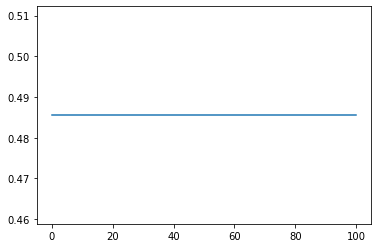

In [26]:
plt.plot(params, accuracies, label='test accuracy')
plt.show()
# stays the same so we keep C = 1.0, the previous model is best

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[24639   584]
 [ 7734   408]]
